In [8]:
# Problem Statement 
# Develop a predictive model to forecast the daily total number of orders for a Brazilian logistics company

# This dataset is collected over 60 days which includes twelve predictive attributes that capture different aspects of the order processing within the company, such as the week of the month, day of the week, types of orders, and orders from various sectors. 
# The target variable is the total number of orders received each day. Accurate forecasting of daily orders is crucial for optimizing resource allocation, improving service efficiency and ensuring timely deliveries.

# The model's predictions will help the logistics company better anticipate demand and optimize their operations.

In [9]:
# Importing the prominent library to used in the data set

In [10]:
import pandas as pd 

In [11]:
# Reading the file

In [12]:
df = pd.read_csv("C://Users//Tiny_//Downloads//DAML ALL//Daily_Demand_Forecasting_Orders.csv")

In [13]:
# checking the data set heads

In [14]:
df.head(5)

,Week of the month (first week second third fourth or fifth week),Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [15]:
# Checking the data type pf each column

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Week of the month (first week  second  third fourth or fifth week)  60 non-null     int64  
 1   Day of the week (Monday to Friday)                                  60 non-null     int64  
 2   Non-urgent order                                                    60 non-null     float64
 3   Urgent order                                                        60 non-null     float64
 4   Order type A                                                        60 non-null     float64
 5   Order type B                                                        60 non-null     float64
 6   Order type C                                                        60 non-null     float64
 7   Fiscal sector order

In [17]:
#Checking for missing values

In [18]:
df.isna().sum()

Week of the month (first week  second  third fourth or fifth week)    0
Day of the week (Monday to Friday)                                    0
Non-urgent order                                                      0
Urgent order                                                          0
Order type A                                                          0
Order type B                                                          0
Order type C                                                          0
Fiscal sector orders                                                  0
Orders from the traffic controller sector                             0
Banking orders (1)                                                    0
Banking orders (2)                                                    0
Banking orders (3)                                                    0
Target (Total orders)                                                 0
dtype: int64

In [19]:
# checking the size of data

In [20]:
df.shape

(60, 13)

In [21]:
# Checking the names of each column

In [22]:
df.columns

Index(['Week of the month (first week  second  third fourth or fifth week)',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

In [23]:
# Scaling Continuous Variable columns

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
ss = StandardScaler()

In [26]:
columns_to_scale = [ 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)']

In [27]:
df[columns_to_scale] = ss.fit_transform(df[columns_to_scale])

In [28]:
df.head(2)

,Week of the month (first week second third fourth or fifth week),Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,2.085656,3.87288,0.505067,1.318768,3.964285,-0.418489,1.740406,-0.038509,2.714011,-0.638259,539.577
1,1,5,-0.637250,-0.84914,-0.752676,-1.057160,-0.217813,-0.418489,-0.337749,-0.562902,0.250452,-1.183895,224.675


In [29]:
# Dividing the dataset into Training and Testing 
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3)
# 70% training part,30% testing parts

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
df.columns

Index(['Week of the month (first week  second  third fourth or fifth week)',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

In [32]:
X = df[['Week of the month (first week  second  third fourth or fifth week)',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)']]
Y = df['Target (Total orders)']

In [33]:
X.shape

(60, 12)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3)

In [35]:
# checking the data size of X_train by shape it.

In [36]:
X_train.shape

(42, 12)

In [37]:
# checking the data size of X_test by shape it.

In [38]:
X_test.shape

(18, 12)

In [39]:
from sklearn.ensemble import RandomForestRegressor
# Initialize the random forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100)

#Train the model using the training sets
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [40]:
# Making predictions on data
y_pred_rf = rf.predict(X_test)

In [41]:
# mean_absolute_error: This function calculates the mean absolute error (MAE) between two arrays representing true and predicted values. 
# MAE measures the average magnitude of the errors without considering their direction. Lower MAE values indicate better model performance.

# mean_squared_error: This function calculates the mean squared error (MSE) between two arrays representing true and predicted values. 
# MSE squares the errors before averaging, giving more weight to larger errors. It's often used in optimization problems but can be sensitive to outliers.


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [43]:
# Measureing the average squared difference between predicted and actual values. Lower is better
mean_absolute_error(Y_test,y_pred_rf)

30.05960444444451

In [44]:
# Measureing the average squared difference between predicted and actual values. Lower is better
mean_squared_error(Y_test,y_pred_rf)

1454.6397444821498

In [45]:
#Representing how well the model explains the variance in the data. Values range from 0 to 1, where closer to 1 indicates a better fit.
r2_score(Y_test, y_pred_rf)

0.7247050033357828

In [46]:
residuals = Y_test - y_pred_rf

In [47]:
#Feature Importance
feature_importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to see feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


                                              Feature  Importance
5                                        Order type B    0.592583
2                                    Non-urgent order    0.238379
10                                 Banking orders (2)    0.057297
6                                        Order type C    0.034580
3                                        Urgent order    0.018074
9                                  Banking orders (1)    0.017103
11                                 Banking orders (3)    0.014468
4                                        Order type A    0.008646
8           Orders from the traffic controller sector    0.008261
7                                Fiscal sector orders    0.007581
1                  Day of the week (Monday to Friday)    0.001573
0   Week of the month (first week  second  third f...    0.001455


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


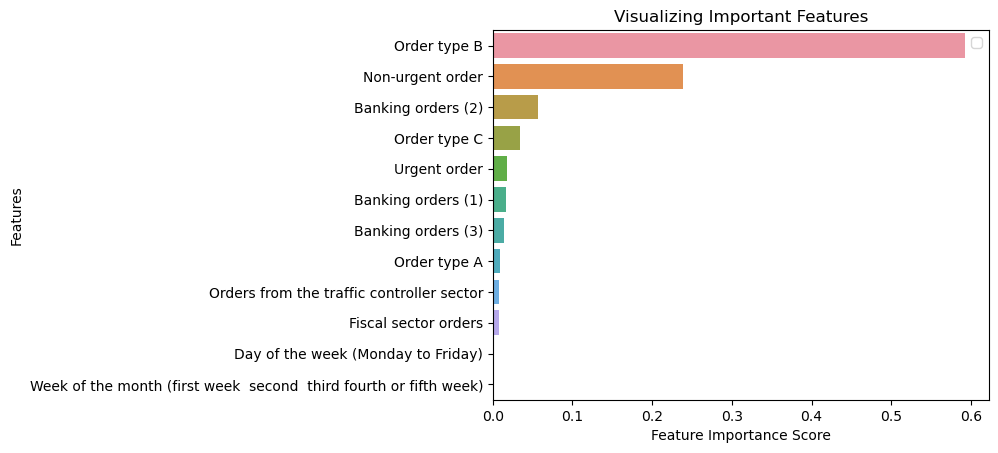

In [48]:
# Visualizing Important Features

feature_imp1 = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp1, y=feature_imp1.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [49]:
# The model is heavily influenced by the type of order (especially "Order type B") and whether the order is urgent or non-urgent. 
# Other features like specific banking orders, fiscal orders and the timing of the order (week of the month or day of the week) have much less impact on the predictions.
# This suggests that the nature and urgency of the order are critical factors in predicting the target variable whereas temporal factors and specific order categories play a minor role.

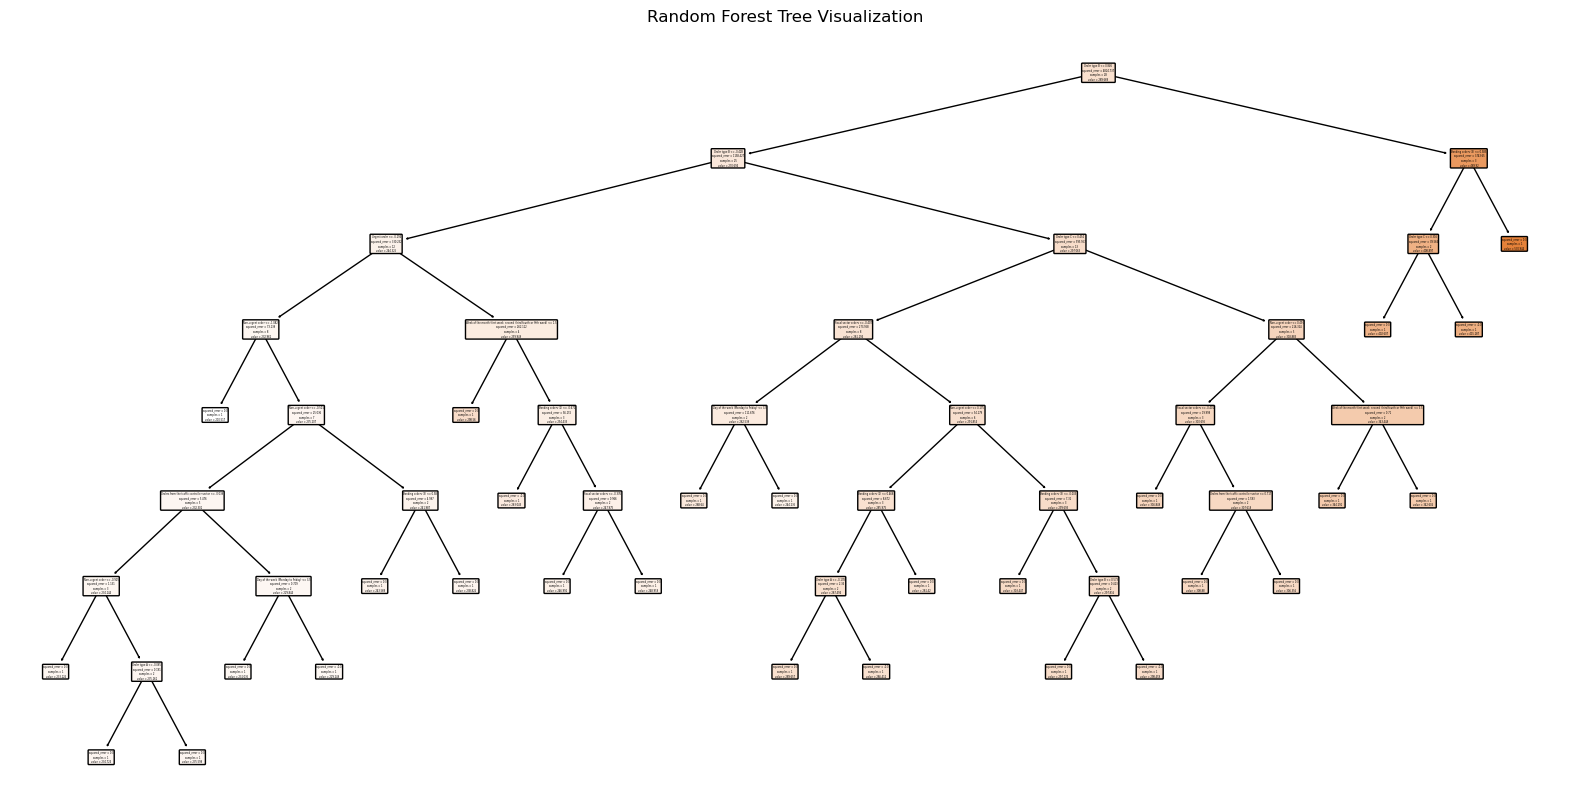

In [50]:
from sklearn.tree import plot_tree

# Visualize one tree from the forest (e.g., the first tree)
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=feature_names, filled=True, rounded=True)
plt.title('Random Forest Tree Visualization')
plt.show()


kNN

In [52]:
from sklearn.neighbors import KNeighborsRegressor

In [53]:
knn = KNeighborsRegressor()

In [54]:
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [55]:
y_pred_knn = knn.predict(X_test)

In [56]:
mean_absolute_error(Y_test,y_pred_knn)

38.627766666666666

In [57]:
mean_squared_error(Y_test,y_pred_knn)

2453.8738751755554

In [58]:
r2_score(Y_test, y_pred_knn)

0.5355969044271127

C:\Users\Tiny_\AppData\Local\Temp\ipykernel_40616\2573368024.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2, color='red', label='Perfect Prediction Line')


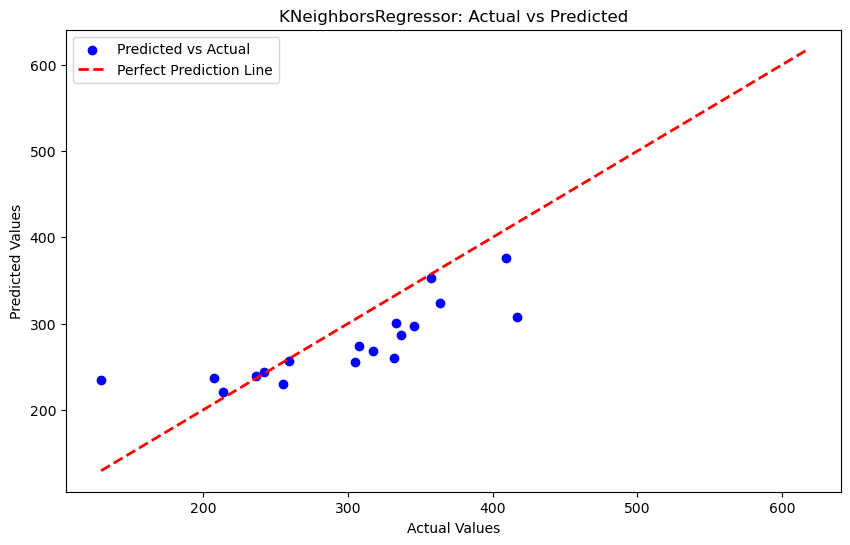

In [59]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred_knn, color='blue', label='Predicted vs Actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2, color='red', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNeighborsRegressor: Actual vs Predicted')
plt.legend()
plt.show()

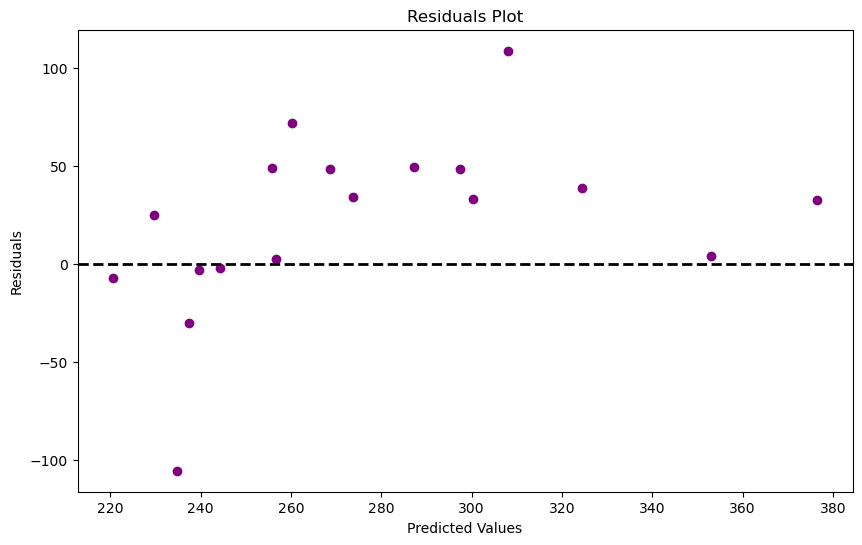

In [60]:
# Plot the residuals
residuals = Y_test - y_pred_knn
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_knn, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [61]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [62]:
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
y_pred_xgb= xgb.predict(X_test)

In [64]:
mean_absolute_error(Y_test,y_pred_xgb)

29.866737915039064

In [65]:
mean_squared_error(Y_test, y_pred_xgb)

1427.7649641272963

In [66]:
r2_score(Y_test, y_pred_xgb)

0.7297911372711476

C:\Users\Tiny_\AppData\Local\Temp\ipykernel_40616\1563364422.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2, color='red', label='Perfect Prediction Line')


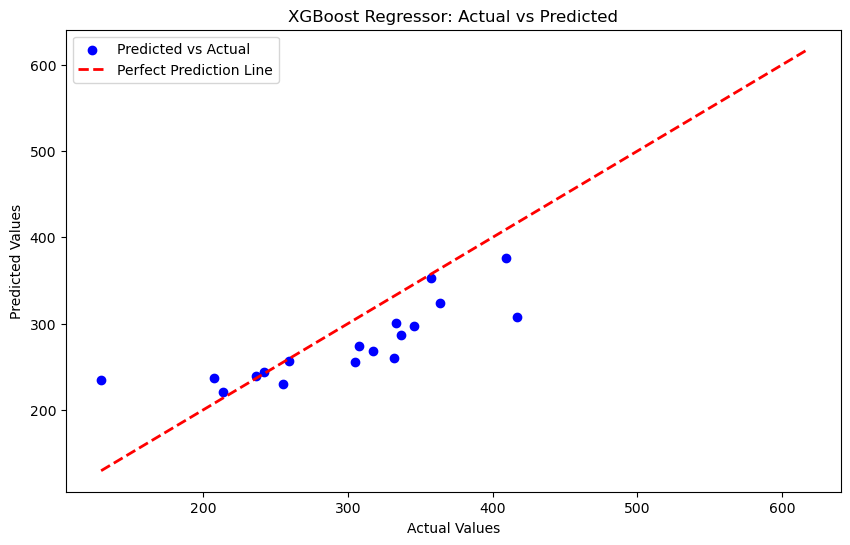

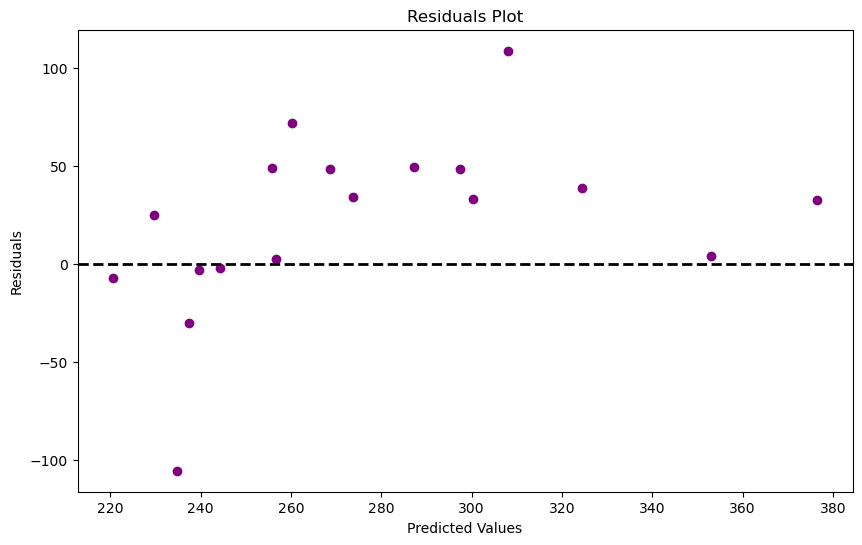

In [67]:
# Plot the Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred_knn, color='blue', label='Predicted vs Actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2, color='red', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Regressor: Actual vs Predicted')
plt.legend()
plt.show()

# Plot the residuals
residuals = Y_test - y_pred_knn
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_knn, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


In [68]:
X_train.columns

Index(['Week of the month (first week  second  third fourth or fifth week)',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)'],
      dtype='object')

In [69]:
new_data_1 = pd.read_excel("C://Users//Tiny_//Downloads//new_data_1.xlsx")

In [70]:
new_data_1

,Week of the month (first week second third fourth or fifth week),Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3)
0,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502
1,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458
2,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948
3,3,4,178.433,102.793,45.706,111.036,124.678,194.000,47046,17299,108719,15560
4,3,5,145.865,91.180,43.851,66.277,133.440,6.523,66910,17768,36693,29046
5,3,6,170.566,114.412,43.339,136.434,128.405,23.200,32529,34002,78153,31949
6,4,2,220.343,141.406,46.241,120.865,196.296,1.653,34878,32905,117137,29188
7,4,3,193.768,141.854,56.519,136.709,143.644,1.250,57858,23956,101048,30134
8,4,4,122.736,124.256,56.167,78.101,112.724,0.000,52321,10046,62799,24233
9,4,5,144.051,158.408,51.660,92.272,164.948,6.421,47167,6440,91784,15973


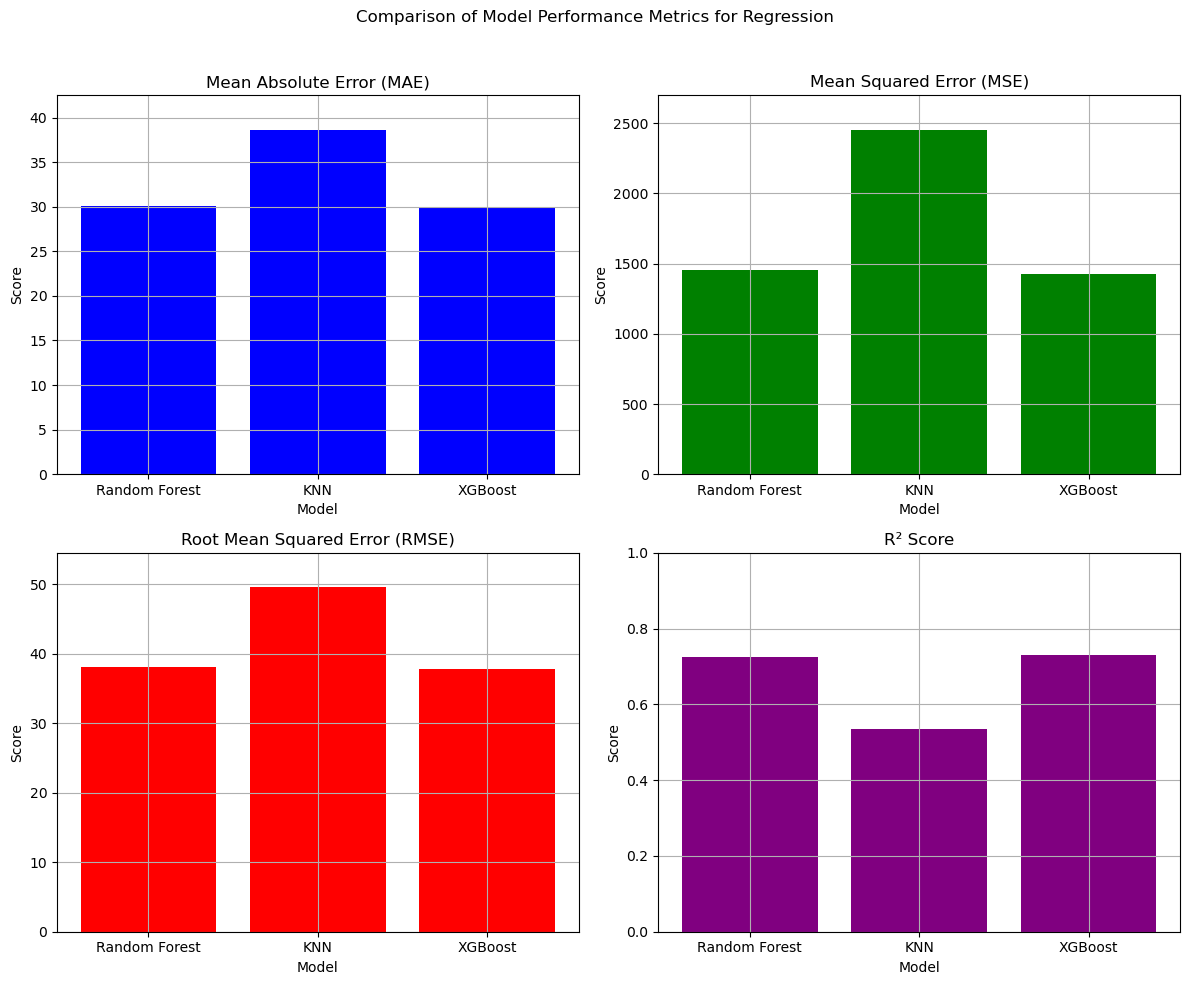

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the regression scores for each model
scores1 = {
    'MAE': mean_absolute_error(Y_test, y_pred_rf),
    'MSE': mean_squared_error(Y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(Y_test, y_pred_rf)),
    'R2': r2_score(Y_test, y_pred_rf)
}

scores2 = {
    'MAE': mean_absolute_error(Y_test, y_pred_knn),
    'MSE': mean_squared_error(Y_test, y_pred_knn),
    'RMSE': np.sqrt(mean_squared_error(Y_test, y_pred_knn)),
    'R2': r2_score(Y_test, y_pred_knn)
}

scores3 = {
    'MAE': mean_absolute_error(Y_test, y_pred_xgb),
    'MSE': mean_squared_error(Y_test, y_pred_xgb),
    'RMSE': np.sqrt(mean_squared_error(Y_test, y_pred_xgb)),
    'R2': r2_score(Y_test, y_pred_xgb)
}

# Create a DataFrame to organize the scores for plotting
import pandas as pd
scores_df = pd.DataFrame([scores1, scores2, scores3], index=['Random Forest', 'KNN', 'XGBoost'])

# Plotting the bar graphs
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Comparison of Model Performance Metrics for Regression')

# Plot Mean Absolute Error
axes[0, 0].bar(scores_df.index, scores_df['MAE'], color='blue')
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylim(0, max(scores_df['MAE']) * 1.1)

# Plot Mean Squared Error
axes[0, 1].bar(scores_df.index, scores_df['MSE'], color='green')
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylim(0, max(scores_df['MSE']) * 1.1)

# Plot Root Mean Squared Error
axes[1, 0].bar(scores_df.index, scores_df['RMSE'], color='red')
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylim(0, max(scores_df['RMSE']) * 1.1)

# Plot R2 Score
axes[1, 1].bar(scores_df.index, scores_df['R2'], color='purple')
axes[1, 1].set_title('R² Score')
axes[1, 1].set_ylim(0, 1)  # R² Score range is generally from 0 to 1

# Adding labels and grid
for ax in axes.flat:
    ax.set_ylabel('Score')
    ax.set_xlabel('Model')
    ax.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()


In [76]:
rf.predict(new_data_1)

array([551.91702, 550.94128, 550.94128, 551.91702, 551.91702, 551.91702,
       550.94128, 550.94128, 551.91702, 551.91702, 551.91702])

In [78]:
knn.predict(new_data_1)

array([495.2648, 518.5902, 457.914 , 518.5902, 495.2648, 495.2648,
       518.5902, 495.2648, 495.2648, 518.5902, 495.2648])

In [80]:
xgb.predict(new_data_1)

array([616.45123, 616.45123, 616.45123, 616.45123, 616.45123, 616.45123,
       616.45123, 616.45123, 616.45123, 616.45123, 616.45123],
      dtype=float32)